In [1]:
import tensorflow as tf
import numpy      as np
import pandas     as pd

from   tensorflow.keras.preprocessing.text import Tokenizer
from   tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import tensorflow as tf
from tensorflow.keras.models   import Sequential
# 자연어 : Embedding
from tensorflow.keras.layers   import Dense , Activation , Embedding , Flatten
from tensorflow.keras.datasets import boston_housing , mnist
from tensorflow.keras          import optimizers
from keras.utils.np_utils      import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import tensorflow_datasets as tfds


In [3]:
# print('Tokenizer를 이용해서 단어사전 제작하기')


# # 1. 시퀀스 작업

# # 토큰 생성
# tokenizer = Tokenizer(num_words = 10000 , oov_token='<OOV>')
# print('type - ' , type(tokenizer))

# # 단어사전 만들기
# tokenizer.fit_on_texts(X_sentesnces)
# print('encoding - ',tokenizer.word_index)

# # 인코딩된 값을 조합하여 문장별로 보여주는 함수
# X_sequence = tokenizer.texts_to_sequences(X_sentesnces)
# print('word_sequence \n' , X_sequence)


# X_padded = pad_sequences(X_sequence , padding = 'post')
# print('shape' , X_padded.shape)
# print('train padding - \n' , X_padded)

In [4]:
# # 자연어에서 입력층은 Dense 대신 Embedding을 사용한다.

# print('Embedding 입력층 - \n 1. 단어사전의 크기 \n 2. 출력의 차원 \n 3. 문장의 길이')

# # 단어 사전의 크기
# len(tokenizer.word_index)

# # 출력의 차원 : 임의로 지정

# # 문장의 길이
# # X_padded.shape 의 features 개수 40개


# # 입력층 생성
# model = Sequential()
# model.add(Embedding(29657 , 128 , input_length = 40))
# model.add( Flatten())

# # 은닉층 생성
# model.add(Dense(units = 10 , activation = 'relu'))
# model.add(Dense(units = 6 ,  activation = 'relu'))
# model.add(Dense(units = 4 ,  activation = 'relu'))
# model.add(Dense(units = 1 ,  activation = 'sigmoid'))




#### NLP(Natural Language Processing)
- NLTK(Natural Language Toolkit) : 말뭉치 , 토큰생성 , 형태소 분석 , 품사 태깅 -> 영어용

- KoNLPy(코엔앨파이) (Korea Natural Languange Python) : 한국어 처리 패키지



In [5]:
print('말뭉치(Corpus) - 자연어 분석 작업을 위해 만든 샘플 문서')

import nltk
# nltk.download('book')
from nltk.book import *


말뭉치(Corpus) - 자연어 분석 작업을 위해 만든 샘플 문서


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma_book = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_book

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

In [8]:
print('type - ' , type(emma_book))
print()
print('torken 작업을 위해 슬라이싱 해보자')
print(emma_book[:1000])

type -  <class 'str'>

torken 작업을 위해 슬라이싱 해보자
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold t

In [9]:
print('token을 만든다 - 자연어 문서 분석을 위해서 긴 문장을 작은 단위로 나누는 작업')
print('문장을 단어로 토큰')
print('nltk는 자연어의 시조새격')
print()

from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
token = sent_tokenize(emma_book[:1000])

print('type - ' , type(token))
print('문장 토큰화')
print(token[0])
print()

from nltk.tokenize import word_tokenize
word_token = word_tokenize(emma_book[:100])
print('단어 토큰화')
print(word_token)
print()

# 불필요한 단어 삭제 ',' 과 같은

from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer("[\w]+")
print('정규표현식을 이용한 단어 토큰화')
print(regexp.tokenize(emma_book[50:100]))

print()


token을 만든다 - 자연어 문서 분석을 위해서 긴 문장을 작은 단위로 나누는 작업
문장을 단어로 토큰
nltk는 자연어의 시조새격

type -  <class 'list'>
문장 토큰화
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

단어 토큰화
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']

정규표현식을 이용한 단어 토큰화
['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']



In [10]:
print('형태소 분석 - ')
print('토큰 - 어근 , 접두사 , 접미사 , 품사 등 언어적 속성을 파악하는 작업')
print('어간추출, 원형복원, 품사태깅')

from nltk.stem import PorterStemmer , LancasterStemmer
porter    = PorterStemmer()
lancaster = LancasterStemmer()
words = ['fly' , 'flies' , 'flying']
print('porter    - ' , [ porter.stem(w) for w in words])
print('lancaster - ' , [ lancaster.stem(w) for w in words])


형태소 분석 - 
토큰 - 어근 , 접두사 , 접미사 , 품사 등 언어적 속성을 파악하는 작업
어간추출, 원형복원, 품사태깅
porter    -  ['fli', 'fli', 'fli']
lancaster -  ['fly', 'fli', 'fly']


In [11]:
print('단어의 품사를 지정하여 정확한 원형을 찾을 수 있다 - ')
print('part of speech(품사태깅) - POS')
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
lm = WordNetLemmatizer()
print('품사태깅을 통한 작업 - ' , [lm.lemmatize(w , pos = 'v') for w in words])

단어의 품사를 지정하여 정확한 원형을 찾을 수 있다 - 
part of speech(품사태깅) - POS
품사태깅을 통한 작업 -  ['fly', 'fly', 'fly']


In [12]:
print('토큰된 단어에 품사를 부착하기 위해서는 품사를 알아야 한다.')
print('고유명사 - NNP , 동사 - VB , 동사 현재형 - VBP 등 이러한 태그 세트가 존재한다.')
# nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
senteces = "Emma was the youngest of the two daughters of a most affectionate salad permit shotgun"
tag_lst = pos_tag(word_tokenize(senteces))
print('태그 리스트 - ' , tag_lst)
# NN - 명사
print()
print('태그 리스트로부터 명사만 추출한다면 - ')

noun_lst = [i for i in tag_lst if i[1] == 'NN']
print('noun_lst' , noun_lst)
print()
print('부착된 품사를 제거 - ')

# 단어만 반환한다.
from nltk.tag import untag
print(untag(tag_lst))

토큰된 단어에 품사를 부착하기 위해서는 품사를 알아야 한다.
고유명사 - NNP , 동사 - VB , 동사 현재형 - VBP 등 이러한 태그 세트가 존재한다.
태그 리스트 -  [('Emma', 'NNP'), ('was', 'VBD'), ('the', 'DT'), ('youngest', 'JJS'), ('of', 'IN'), ('the', 'DT'), ('two', 'CD'), ('daughters', 'NNS'), ('of', 'IN'), ('a', 'DT'), ('most', 'RBS'), ('affectionate', 'JJ'), ('salad', 'JJ'), ('permit', 'NN'), ('shotgun', 'NN')]

태그 리스트로부터 명사만 추출한다면 - 
noun_lst [('permit', 'NN'), ('shotgun', 'NN')]

부착된 품사를 제거 - 
['Emma', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'salad', 'permit', 'shotgun']


<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>



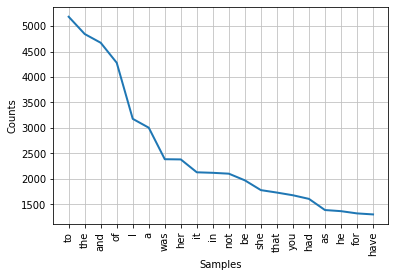

In [13]:
from nltk import Text
import matplotlib.pyplot as plt

txt = Text(regexp.tokenize(emma_book))
print(txt)
print()

# 시각화가 가능하다.

txt.plot(20)
plt.show()
plt.close()



In [14]:
print('문서에서 사용된 단어(토큰)의 사용빈도에 따른 시각화 - 워드클라우드')
print('불필요한 단어(stop words - 제거')
print('type - ' , txt.vocab())

from nltk import FreqDist
user_stop_words = ['Mr' , 'Mrs' , 'Miss' , 'Mr' , 'Mrs' , 'Dear']
emma_tokens = pos_tag(regexp.tokenize(emma_book))
name_lst = [ t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in user_stop_words]
df_names = FreqDist(name_lst)


문서에서 사용된 단어(토큰)의 사용빈도에 따른 시각화 - 워드클라우드
불필요한 단어(stop words - 제거
type -  <FreqDist with 7723 samples and 161983 outcomes>


In [15]:
# 명사의 사전 df_names
print('type - ' , type(df_names))
# 해당 단어의 기입량을 반환한다.
print('Emma 기입량' , df_names['Emma'])
print('Emma 빈도률' , df_names.freq('Emma'))
print('most freq 5'  , df_names.most_common(5))


type -  <class 'nltk.probability.FreqDist'>
Emma 기입량 830
Emma 빈도률 0.10555767518758744
most freq 5 [('Emma', 830), ('Harriet', 491), ('Weston', 439), ('Knightley', 389), ('Elton', 385)]


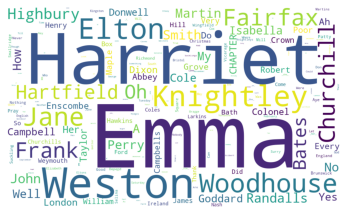

In [16]:
# 워드 클라우드 만들기
from wordcloud import WordCloud

# 워드 클라우드 생성
# 내부 옵션을 설정해주자.
# width 가로 height 세로 background_color 배경색 random_state seed값 고정(출력값이 랜덤인 것을 하나로 고정해준다.)
wc = WordCloud(width = 1000 , height = 600 , background_color = 'white' , random_state=100)

# 워드클라우드 객체를 가지고 imshow를 한다.
plt.imshow(wc.generate_from_frequencies(df_names))
plt.axis('off')
plt.show()
plt.close()

In [17]:
# # KoNLPy 설치

# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)


In [18]:
print('한국어 자연어 처리 - konlpy(말뭉치 , 헌법 ,국회법안)')
from konlpy.corpus import kolaw , kobill
# kolaw의 파일명 출력
print('헌법     - ' , kolaw.fileids())
print('국회법안 - ' , kobill.fileids())


한국어 자연어 처리 - konlpy(말뭉치 , 헌법 ,국회법안)
헌법     -  ['constitution.txt']
국회법안 -  ['1809895.txt', '1809898.txt', '1809899.txt', '1809896.txt', '1809891.txt', '1809897.txt', '1809893.txt', '1809890.txt', '1809894.txt', '1809892.txt']


In [19]:
# 텍스트 문서 읽어들이기

corpus_sample01 = kolaw.open('constitution.txt').read()
corpus_sample02 = kobill.open('1809890.txt').read()

In [20]:
print('sample01 type - ' , type(corpus_sample01))
print('sample02 type - ' , type(corpus_sample02))
print()
print(corpus_sample01[:40])
print('kobill ')
print(corpus_sample02[:40])

sample01 type -  <class 'str'>
sample02 type -  <class 'str'>

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로
kobill 
지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [21]:
# print('kaist - hannanum , snu - kkma , twitter - Okt , mecab : 형태소 분석기')

# from konlpy.tag import *
# from konlpy.tag import Hannanum

# kaist = Hannanum()
# snu   = Kkma()
# mecab = Mecab()
# twitter = Okt()


In [22]:
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [23]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [24]:
# %%bash
# bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# pip3 install /tmp/mecab-python-0.996

In [25]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [26]:
print('kaist - hannanum , snu - kkma , twitter - Okt , mecab : 형태소 분석기')

from konlpy.tag import *
# from konlpy.tag import Hannanum

#kaist = Hannanum()
#snu   = Kkma()
mecab = Mecab()
#twitter = Okt()


print('명사 추출   - ' , mecab.nouns(corpus_sample01[:40]))
print('형태소 추출 - ' , mecab.morphs(corpus_sample01[:40]))
print('품사 부착   - ' , mecab.pos(corpus_sample01[:40]))

kaist - hannanum , snu - kkma , twitter - Okt , mecab : 형태소 분석기
명사 추출   -  ['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동']
형태소 추출 -  ['대한민국', '헌법', '유구', '한', '역사', '와', '전통', '에', '빛나', '는', '우리', '대한', '국민', '은', '3', '·', '1', '운동', '으로']
품사 부착   -  [('대한민국', 'NNP'), ('헌법', 'NNG'), ('유구', 'XR'), ('한', 'XSA+ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV'), ('는', 'ETM'), ('우리', 'NP'), ('대한', 'VV+ETM'), ('국민', 'NNG'), ('은', 'JX'), ('3', 'SN'), ('·', 'SC'), ('1', 'SN'), ('운동', 'NNG'), ('으로', 'JKB')]


In [27]:
# 태그셋 - 태그 의미 확인
mecab.tagset.values()

dict_values(['연결 어미', '종결 어미', '선어말어미', '관형형 전성 어미', '명사형 전성 어미', '감탄사', '접속 조사', '부사격 조사', '보격 조사', '관형격 조사', '목적격 조사', '인용격 조사', '주격 조사', '호격 조사', '보조사', '일반 부사', '접속 부사', '관형사', '의존 명사', '단위를 나타내는 명사', '일반 명사', '고유 명사', '대명사', '수사', '구분자 , · / :', '줄임표 …', '마침표, 물음표, 느낌표', '한자', '외국어', '숫자', '닫는 괄호 ), ]', '여는 괄호 (, [', '기타 기호', '형용사', '부정 지정사', '긍정 지정사', '동사', '보조 용언', '체언 접두사', '어근', '형용사 파생 접미사', '명사파생 접미사', '동사 파생 접미사'])

In [28]:
 import pandas as pd
 
 mecab_tag_frm = pd.DataFrame()
 mecab_tag_frm['기호'] = mecab.tagset.values()
 mecab_tag_frm['품사'] = mecab.tagset.keys()

In [29]:
mecab_tag_frm

,기호,품사
0,연결 어미,EC
1,종결 어미,EF
2,선어말어미,EP
3,관형형 전성 어미,ETM
4,명사형 전성 어미,ETN
5,감탄사,IC
6,접속 조사,JC
7,부사격 조사,JKB
8,보격 조사,JKC
9,관형격 조사,JKG


In [30]:
# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

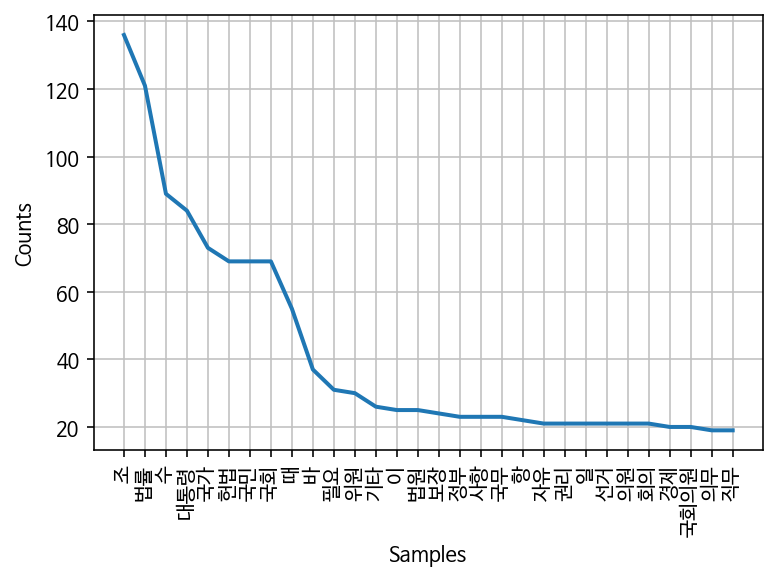

In [31]:
# 플롯 시키기
law = Text(mecab.nouns(corpus_sample01))
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family = 'NanumBarunGothic')
law.plot(30)
plt.show()
plt.close()

In [32]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'


In [37]:
# 나눔 폰트 설치
!apt-get update -qq

In [39]:
# 나눔 폰트 확인
# matplotlib.font_manager 사용

import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

lst = [f for f in sys_font if 'Nanum' in f]
lst

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf']

In [43]:
# 폰트 적용시키기

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path , size = 10).get_name()
print(font_name)
plt.rc('font' , family = font_name)
fm._rebuild

NanumGothic


<function matplotlib.font_manager._rebuild()>

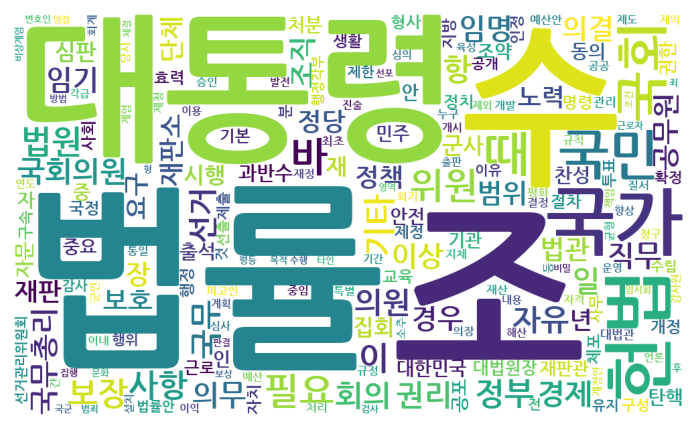

In [45]:
# 워드 클라우드 만들기
from wordcloud import WordCloud

# 워드 클라우드 생성
# 내부 옵션을 설정해주자.
# width 가로 height 세로 background_color 배경색 random_state seed값 고정(출력값이 랜덤인 것을 하나로 고정해준다.)
wc = WordCloud(width = 1000 , height = 600 , background_color = 'white' , random_state=100 , font_path = path)

# 워드클라우드 객체를 가지고 imshow를 한다.
plt.imshow(wc.generate_from_frequencies(law.vocab()))
plt.axis('off')
plt.show()
plt.close()

In [34]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


In [46]:
from google.colab import files

In [47]:
chat_json = files.upload()

Saving intents.json to intents.json


In [49]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


with open('intents.json' , 'r') as file :
  data = json.load(file)

In [51]:
data['intents'][0]

{'tag': 'greeting',
 'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Hay'],
 'responses': ['Hello', 'Hi', 'Hi there']}

In [53]:
# 챗봇을 만들어보자.
# 챗봇은 지도학습이다.

# 문장
training_sentences = []
# 정답
training_labels = []
labels = []
responses = []


# 'data' 안에서 intent를 가져오자.
# 또한 intent 안에서 pattern을 가져오자.
# 문장에는 패턴을 , 라벨에는 태그(target)를 저장하자.

for intent in data['intents'] :
  for pattern in intent['patterns']:
    training_sentences.append(pattern)
    training_labels.append(intent['tag'])
  responses.append(intent['responses'])
  
  if intent['tag'] not in labels:
    labels.append(intent['tag'])



In [54]:
# tag(target)이 담긴 training_labels를 인코딩하자.
# 레이블은 숫자가 담겨야하기 때문에 인코딩이 필요하다.
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)
print(training_labels)

# 다중분류(숫자)인 경우에는 스파르스 카테 뭐시기? 를 loss??


[4 4 4 4 4 3 3 3 7 7 7 7 0 0 0 6 6 6 5 5 5 5 5 5 5 2 2 2 2 2 1 1 1]


In [34]:
# input data -> 토큰화 -> fit ont text -> 단어사전 -> 시퀀스 -> padding 
# 위에서 input data는 training_sentences가 된다.
# 이 작업을 진행하는 것이 첫번째 과정이다.

training_sentences

In [56]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

# 토큰화
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
# fit on text
tokenizer.fit_on_texts(training_sentences)
# 단어사전
word_index = tokenizer.word_index
print('word index - ')
print(word_index)
print()
# 시퀀스
sequences = tokenizer.texts_to_sequences(training_sentences)
# padding
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)


word index - 
{'<OOV>': 1, 'you': 2, 'a': 3, 'i': 4, 'me': 5, 'to': 6, 'account': 7, 'help': 8, 'what': 9, 'is': 10, 'for': 11, 'are': 12, 'can': 13, 'need': 14, 'create': 15, 'new': 16, 'complaint': 17, 'there': 18, 'thanks': 19, 'who': 20, 'your': 21, 'name': 22, 'please': 23, 'support': 24, 'how': 25, 'open': 26, 'want': 27, 'an': 28, 'hi': 29, 'hey': 30, 'anyone': 31, 'hello': 32, 'hay': 33, 'bye': 34, 'see': 35, 'later': 36, 'goodbye': 37, 'thank': 38, "that's": 39, 'helpful': 40, 'the': 41, 'should': 42, 'call': 43, 'whats': 44, 'could': 45, 'give': 46, 'hand': 47, 'do': 48, 'have': 49, 'raise': 50, 'about': 51, 'service': 52}



In [57]:
# 시퀀스 생성
model = Sequential()
# Embedding 
# input length는 위에서 max_len을 20 넣었으니 20이 들어간다.
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
# 플랫? 과정 GlobalAveragePooling1D()
model.add(GlobalAveragePooling1D())

# input demension 16차원
# 은닉층
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# 출력층
# len(labels) = 8
# 최종적으로 마지막으로 8개의 dense를 만든다.
# 이 구조는 8개의 결과물을 모두 사용할 수 있도록 한다.
model.add(Dense(len(labels), activation='softmax'))

# 컴파일
# 다중분류 - 숫자 이므로, sparse_categorical_crossentropy 사용한다.
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
____________________________________________________

In [58]:
# epochs 500번 주고 fit을 한다.

epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)


Epoch 1/500
2/2 [==============================] - 1s 21ms/step - loss: 2.0808 - accuracy: 0.0909
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 2.0790 - accuracy: 0.0909
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0783 - accuracy: 0.0909
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0772 - accuracy: 0.0909
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 2.0762 - accuracy: 0.0909
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 2.0753 - accuracy: 0.0909
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 2.0744 - accuracy: 0.0909
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 2.0737 - accuracy: 0.1515
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0730 - accuracy: 0.2424
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 2.0725 - accuracy: 0.2424
Epoch 11/500
2/2 [=========

In [55]:
# 쟝고의 백엔드에 model을 올려두고, request가 들어왔을때 predict가 되어야한다.
# 이 때 predict 하고 학습 또한 가능하다 -> 전이 학습

In [64]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)


In [79]:
def user_chat_bot() : 
  model = keras.models.load_model('chat_model')

  with open('tokenizer.pickle', 'rb') as handle:
      tokenizer = pickle.load(handle)
      
  with open('label_encoder.pickle', 'rb') as ecn_file:
      lbl_encoder = pickle.load(ecn_file)

  max_len = 20 

  while True : 
    print('User Input Message : ' , end="")
    msg = input()
    if msg.lower() == 'quit' :
      break 
    
    result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([msg]),
                                             truncating='post', maxlen=max_len))
    
    tag = lbl_encoder.inverse_transform([np.argmax(result)])
    print('predict - target : ' , tag  , result)
    for d in data['intents'] :
      if d['tag'] == tag :
        print('ChatBot : ' , np.random.choice(d['responses']))


In [80]:
# 특정 문자를 input 하면 예측 정확도중 가장 높은 확률을 찾아 response로 반환하여 대답한다.

user_chat_bot()

EOFError: ignored